In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [205]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# pandas manipulations

## mapping
- converting one set of values to another
- e.g: converting gender to a binary format

In [206]:
print(df['Sex'])

# will use boolean masking
df['Sex'] = (df['Sex']=='male')
print(df['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool


## filling missing values
- we will fill `embarked` table with the mode value

In [207]:
print(df['Embarked'].mode())    # returns index, val
print(df['Embarked'].mode()[0]) # returns  val, done because a some values have the same frequency, making the value multi model
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

0    S
Name: Embarked, dtype: object
S


## grouping 

### some rules
- suppose grouping col 1 based on col 2
- the grouping should be meaningful
- most of time, a  $\text{cont. }\xrightarrow{\text{mapped  to}} \text{ discrete}$
- like prices grouped to fruits
- or 'Age' mapped to 'Pclass'

In [208]:
print(df.groupby('Pclass')['Age'].sum())
print(df.groupby('Pclass')['Age'].mean())
print(df.groupby('Pclass')['Age'].median())
print(df.groupby('Pclass')['Age'].count())
print(df.groupby('Pclass')['Age'].max())


Pclass
1    7111.42
2    5168.83
3    8924.92
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64
Pclass
1    186
2    173
3    355
Name: Age, dtype: int64
Pclass
1    80.0
2    70.0
3    74.0
Name: Age, dtype: float64


## getting averages of values

In [209]:
print(df['Age'].mean()) # center of data, "mass"
print(df['Age'].median()) # middle of data
print(df['Age'].mode()[0]) # highest freq. value

29.69911764705882
28.0
24.0


## pandas series manipulation

In [210]:
# for discrete collections of values, 
# Pclass = [1,2,5,2,5] -> 1: 1, 2: 2, 5: 5
print(df['Pclass'].value_counts())

# show collections as % of total
print(df['Pclass'].value_counts(normalize=True))


Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


# matplotlib graphs

- line 
- scatter
- pie   
- histogram (frequency of val. in array) 
- bar

|Plot Type|Example Data Setup|Primary Syntax|
|-|-|-|
| **Line** | `x = [1, 2, 3]`, `y = [10, 20, 15]` | `plt.plot(x, y)` |
| **Scatter** | `x = [1, 2, 3]`, `y = [10, 20, 15]` | `plt.scatter(x, y)` |
| **Bar** | `labels = ['A', 'B']`, `height = [5, 12]` | `plt.bar(labels, height)` |
| **Histogram** | `data = [1, 2, 2, 3, 3, 3, 4]` | `plt.hist(data, bins=4)` |
| **Pie** | `size = [40, 30, 30]`, `Label = ['X', 'Y', 'Z']` | `plt.pie(size, labels=Label)` |


## decorations
- for formatting of the plot

(40.0, 90.0)

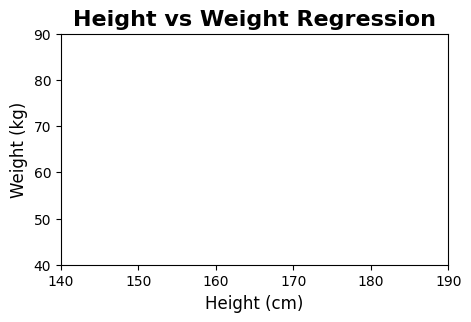

In [211]:
# for controlling the canvas itself, is the base on which the rest is defined
fig, ax = plt.subplots(figsize=(5, 3), dpi=100) # Width, Height in inches

# title
ax.set_title("Height vs Weight Regression", fontsize=16, fontweight='bold')

# axes labels
ax.set_xlabel("Height (cm)", fontsize=12)
ax.set_ylabel("Weight (kg)", fontsize=12)

# axes limits
ax.set_xlim(140, 190) # min, max for X
ax.set_ylim(40, 90)   # min, max for Y



# ax.set_legend(loc="upper left", frameon=True)

# annotation, adding a point on graph
# plt.text(172, 70, "Target Prediction", color="green")


## line graph

- best for showing *trends* 
- over an ordered interval  

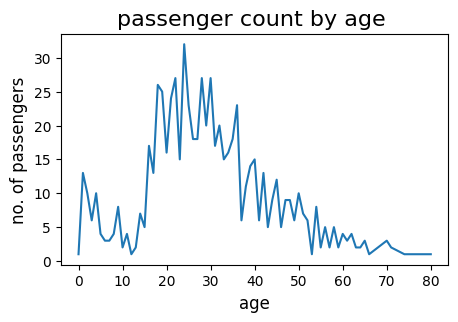

In [212]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.set_title("passenger count by age ", fontsize=16)
ax.set_xlabel("age", fontsize=12)
ax.set_ylabel("no. of passengers", fontsize=12)
##########################################

#groups age as mean by pclass
ageCount = df['Age'].round().value_counts().sort_index()
# plt.xticks(ageCount.index) # only displays the values in this array, in the x-axis
ax.plot(ageCount.index,ageCount.values)


## scatter plot
- for showing the raw data

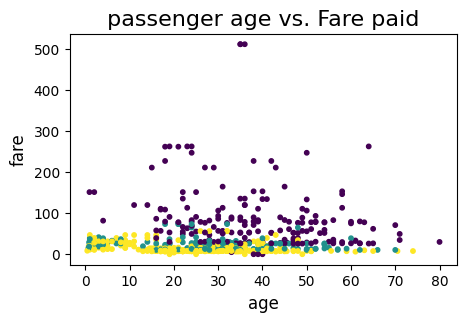

In [213]:
fig , ax = plt.subplots(figsize=(5, 3))

ax.set_title(" passenger age vs. Fare paid ", fontsize=16)
ax.set_xlabel("age", fontsize=12)
ax.set_ylabel("fare", fontsize=12)

##########################################
# plt.yticks(df['Pclass'].index) # DO NOT USE plt.yticks(df['Pclass']), this draws the values 1 2 3 hundreds of times
# plt.yticks(df["Pclass"].unique()) # better method

#                                v`` set color based 3rd var, which must be int arr
ax.scatter(df['Age'],df['Fare'],c=df['Pclass'],s=10)


## bar

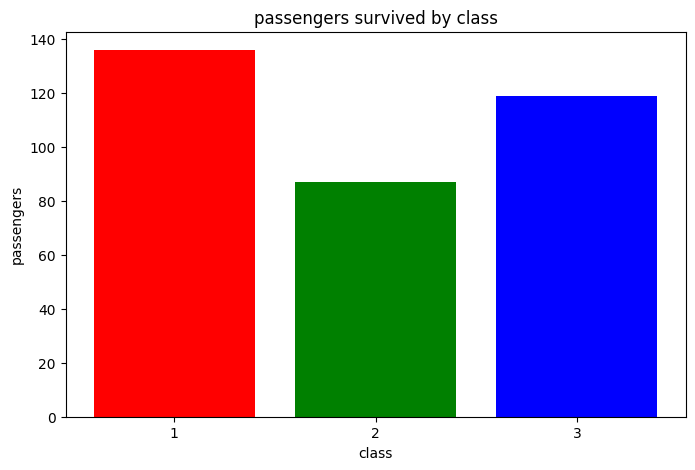

In [214]:
fig, ax = plt.subplots(figsize = (8,5)) # only a single plot is being defined
survived_by_class  = df.groupby('Pclass')['Survived'].sum()


ax.set_title("passengers survived by class")
ax.set_xlabel("class")
ax.set_ylabel("passengers")

colors = ['red','green','blue']

ax.bar(survived_by_class.index,survived_by_class.values,color = colors)
ax.set_xticks([1,2,3])


### rotating a graph

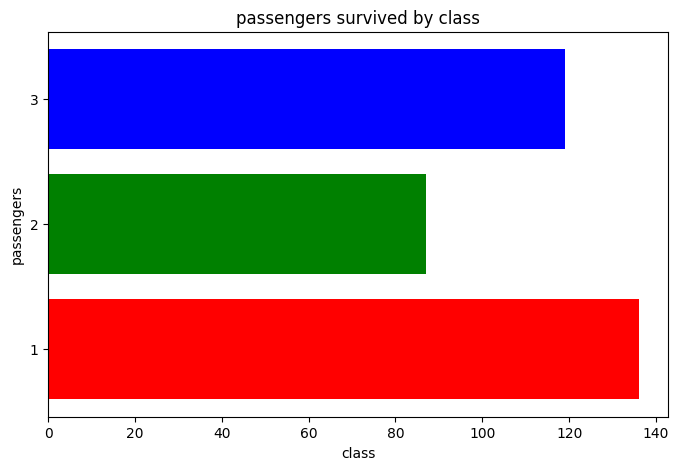

In [215]:
fig, ax = plt.subplots(figsize = (8,5)) # only a single plot is being defined
survived_by_class  = df.groupby('Pclass')['Survived'].sum()


ax.set_title("passengers survived by class")
ax.set_xlabel("class")
ax.set_ylabel("passengers")

colors = ['red','green','blue']

##    v``` THIS IS THE ONLY DIFFERENCE
ax.barh(survived_by_class.index,survived_by_class.values,color = colors)
#####  V`` and this
ax.set_yticks([1,2,3])


## histogram

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

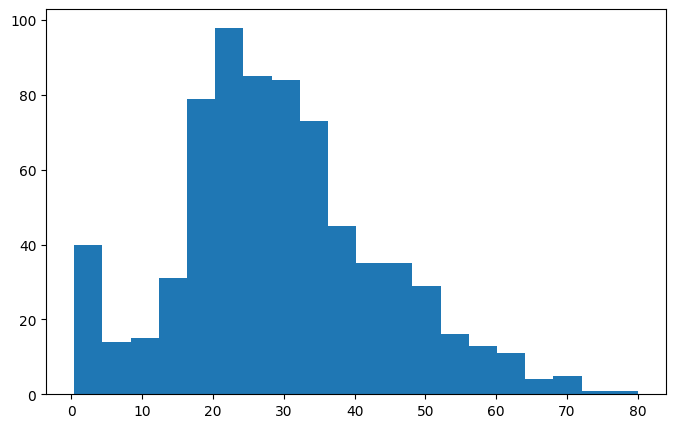

In [216]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(df['Age'],bins=20)

## 2 plots side by side

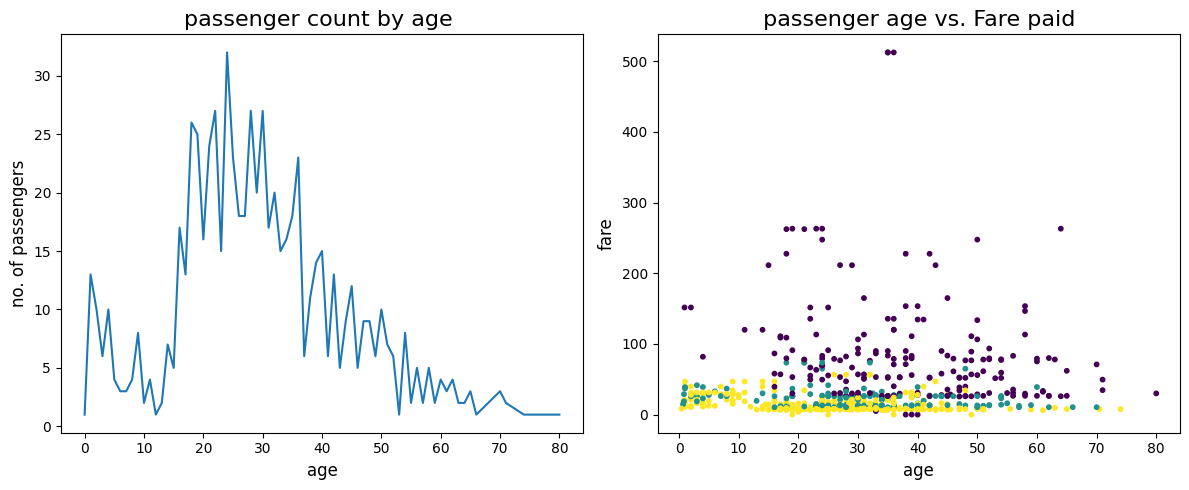

In [217]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,5)) # 1 rows, 2 column

# Difference b/w 
# fig, ax1 = plt.subplots and plt.figure()
# plt.title                -> ax1.set_title

ageCount = df['Age'].round().value_counts().sort_index()
######### PLOT 1 #########
ax1.set_title("passenger count by age ", fontsize=16)
ax1.set_xlabel("age", fontsize=12)
ax1.set_ylabel("no. of passengers", fontsize=12)
ax1.plot(ageCount.index,ageCount.values)


######### PLOT 2 #########
ax2.set_title(" passenger age vs. Fare paid ", fontsize=16)
ax2.set_xlabel("age", fontsize=12)
ax2.set_ylabel("fare", fontsize=12)
ax2.scatter(df['Age'],df['Fare'],c=df['Pclass'],s=10)


######### PLOT both #########
plt.tight_layout()
plt.show()


# machine learning

- decision trees
- linear regression
  - single
  - multiple

## SLR

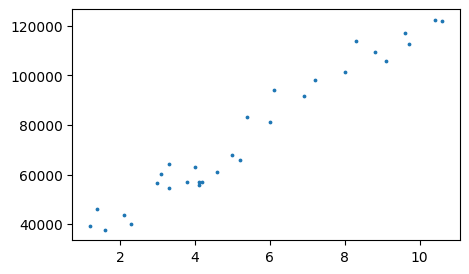

In [218]:
D = {
    "YearsExperience" : [1.2,1.4,1.6,2.1,2.3,3.0,3.1,3.3,3.3,3.8,4.0,4.1,4.1,4.2,4.6,5.0,5.2 ,5.4,6.0,6.1,6.9,7.2,8.0,8.3,8.8,9.1,9.6,9.7,10.4,10.6],
    "Salary": [39344,46206,37732,43526,39892,56643,60151,54446,64446,57190,63219,55795,56958,57082,61112,67939,66030,83089,81364,93941,91739,98274,101303,113813,109432,105583,116970,112636,122392,121873]
}

df = pd.DataFrame(D)

fig, ax = plt.subplots(figsize = (5,3))

x = pd.Series(D["YearsExperience"])
y = pd.Series(D["Salary"])

ax.scatter(x,y,s=3)

### idea

- above is a set of points, and a line must match these points, 
- the output should be slope $m$ and intercept $b$

$$
b = \bar{y}-m\bar{x}
$$
- $\bar{x}$ is mean of x

$$
m = { \sum (x_i - \bar{x})(y_i - \bar{y})  \over \sum (x_i - \bar{x})^2 }
$$

- $x_i - \bar{x}$ is the $x$ column *normalized*

In [219]:
x_norm = x - x.mean()
y_norm = y - y.mean()

m = (x_norm*y_norm).sum() / (x_norm**2).sum()
print(m)

9449.962321455076


In [220]:
b = y.mean() - m*x.mean()

print(b)

24848.2039665232


### plotting the line

- line at minimum needs 2 points for drawing

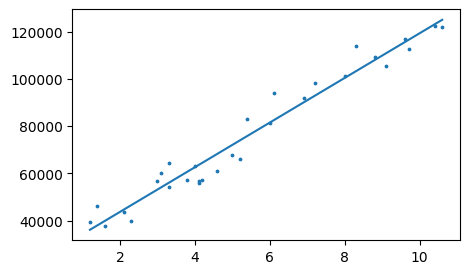

In [221]:
x_min = x.min()
x_max = x.max()

def func(val):
    return m*val +b

y_min = func(x_min)
y_max = func(x_max)

x_line = [x_min,x_max]
y_line = [y_min,y_max]

fig , ax = plt.subplots(figsize=(5,3))

ax.plot(x_line,y_line)
ax.scatter(x,y,s=3)

## MLR

- and the scikit way of performing LR

[81547.97789525]


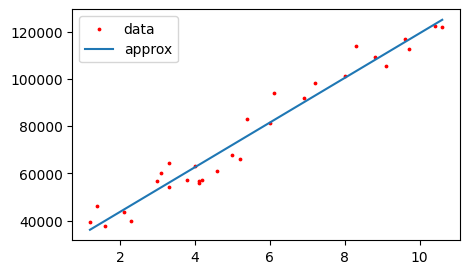

coeff (slope):  9449.962321455074
intercept:  24848.203966523208


In [222]:
from sklearn.linear_model import LinearRegression

X = np.array(D['YearsExperience']).reshape(-1,1)
y = np.array(D['Salary'])

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

fig, ax = plt.subplots(figsize= (5,3))
ax.scatter(X,y,s=3,label = 'data',c='red')
ax.plot(X,y_pred, label = 'approx')
#predict for a specific value 

input = np.array([[6]])
print(model.predict(input))
plt.legend()
plt.show()
# y=c0x0+c1x1+c2x2+c3x3 ...
print("coeff (slope): ", model.coef_[0])
print("intercept: ", model.intercept_)


### MLR derivation

- suppose SLR 

$$
y = \beta_{0}+\beta_{1}x_{1}
$$

- in this simpler view, 
	- $m/\beta_{1}:$ the slope
	- $\beta_{0}:$ is the intercept, it will have no $x$ attached to it hence it is multiplied by 1
		- $\beta$ is a array of biases to be tweaked
		- **we will return** $\beta$
	- $x:$ array of inputs/ a feature
	- $y:$ array of outputs
- for MLR simply extend the number of features 


$$
y = \beta_{0}(1)+\beta_{1}x_{1}+\beta_{2}x_{2}+\dots\beta_{m}x_{m}
$$
- since $x_{i}$ is already an array or a vector
- we will then expand this equation to fit for each $x_{i},y_{i}$

$$
\begin{align}
y_{1} = \beta_{0}(1)+\beta_{1}x_{1,1}+\beta_{2}x_{1,2}+\dots+\beta_{m}x_{m}\\
y_{2} = \beta_{0}(1)+\beta_{1}x_{2,1}+\beta_{2}x_{2,2}+\dots+\beta_{m}x_{m}\\
y_{n} = \beta_{0}(1)+\beta_{1}x_{n,1}+\beta_{2}x_{n,2}+\dots+\beta_{m}x_{m}\\
\end{align}
$$
- we can define this in matrix form

$$
\begin{bmatrix}
y_1 \\
y_2 \\ 
\vdots \\
y_n
\end{bmatrix} = 
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \dots &x_{1,m} \\
1 & x_{2,1} & x_{2,2} & \dots &x_{2,m} \\
\vdots & \vdots & \vdots & \ddots &\vdots\\
1 & x_{n,1} & x_{n,2} & \dots &x_{n,m}
\end{bmatrix} 
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2   \\
\vdots \\
\beta_m  \\
\end{bmatrix}
$$

- or

$$
\textbf{y} = \textbf{X}\beta
$$

- $\textbf{y}_{n\times 1}:$ the target array
- $\textbf{X}_{n \times (m+1)}:$ design matrix
- $\beta_{(m+1) \times 1}:$ parameter array

### OLS function

$$
\beta = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}
$$
- or
$$
\textbf{w} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}
$$


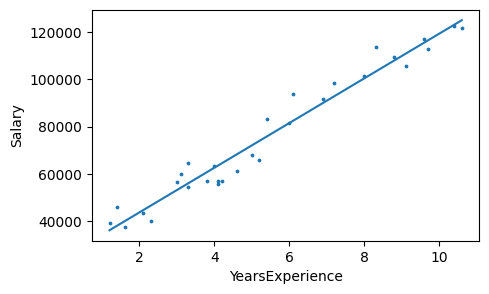

In [223]:
# reshape converts an arr to matrix
# for reshape(-1,1) 
## -1 means n amount of rows, and 
##  1 column

orig_X = np.array(D['YearsExperience']).reshape(-1,1)
y = np.array(D['Salary'])

# ------------------------
# convert X mxn to X mxn+1
X = np.c_[np.ones((len(orig_X),1)),orig_X]
# print(X)


# ------------------------
# perform OLS
w = (np.linalg.inv(X.T@X))@X.T@y
y_p = X@w
# ------------------------


# plot data
# ------------------------
plt.figure(figsize=(5,3))
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.scatter(orig_X,y,s=3)
plt.plot(X[:,1],y_p)



## Decision Trees

In [224]:
url = "https://raw.githubusercontent.com/aman9801/multiple-linear-regression-on-housing-dataset/master/mlr_housing.csv"

df = pd.read_csv(url)

df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### objective

- predict price based on area, bedrooms, bathrooms, guestroom and stories

In [225]:
df['guestroom'] = (df['guestroom']=='yes')
df['mainroad'] = (df['mainroad']=='yes')
X = df[['area','bedrooms','guestroom','mainroad']]
y = df['price']

# split dataset into 25% test set and 75% training split

from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(
    X,y, test_size=0.25, random_state=42 # seed
)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5,random_state=42)
tree.fit(X_tr,y_tr)

# from sklearn.tree import plot_tree
# _ = plot_tree(tree,feature_names=['area','bedrooms','bathrooms','guestroom'])
# plt.show()

from sklearn.metrics import accuracy_score

y_p = tree.predict(X_te)
accuracy = accuracy_score(y_te,y_p)

print("accuracy: ",accuracy)

accuracy:  0.021897810218978103
